In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df = pd.read_csv("../data/merged_data_clean.csv")
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTZ,DBQ095Z,DBD100,DRQSPREP,...,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWSZ
0,109266,2,29,6,5.00,5,3,1.0,1.0,4.0,...,1.423,0.000,0.028,0.004,0.007,0.000,2268.9,2268.9,0.0,1.0
1,109271,1,49,3,NaN,2,3,1.0,2.0,1.0,...,2.115,0.001,0.172,0.011,0.026,0.003,0.0,0.0,0.0,1.0
2,109273,1,36,3,0.83,4,3,4.0,NaN,2.0,...,0.328,0.000,0.114,0.005,0.016,0.005,0.0,0.0,0.0,91.0
3,109274,1,68,7,1.20,4,3,4.0,NaN,2.0,...,2.676,0.000,0.209,0.005,0.025,0.035,1800.0,1800.0,0.0,1.0
4,109282,1,76,3,3.61,5,1,1.0,2.0,4.0,...,1.257,0.000,0.062,0.005,0.002,0.006,105.0,105.0,0.0,4.0


In [3]:
df.shape

(9208, 146)

In [4]:
df.columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'INDFMPIR', 'DMDEDUC2',
       'DMDMARTZ', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DSDANTA', 'DSD128V',
       'DSD128FF', 'DSQTKCAL', 'BMXBMI', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3',
       'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2',
       'BPXOPLS3', 'LBXSBU', 'LBXSCA', 'LBXSUA', 'URDACT', 'URDFLOW1',
       'URDFLOW2', 'URDFLOW3', 'LBXGLU', 'URXUPB', 'BPQ020', 'BPQ080',
       'BPQ050A', 'DIQ010', 'DIQ050', 'DIQ070', 'DIQ160', 'DBD895',
       'DBD900', 'DBD905', 'DBD910', 'DBQ700', 'KIQ022', 'KIQ026',
       'KIQ005', 'KIQ010', 'KIQ042', 'KIQ044', 'KIQ046', 'KIQ480',
       'MCQ080', 'MCQ160M', 'MCQ520', 'MCQ550', 'MCQ366A', 'MCQ366B',
       'MCQ366C', 'MCQ366D', 'MCQ160L', 'MCQ300C', 'PAQ605', 'PAQ620',
       'PAQ635', 'PAQ650', 'PAQ665', 'PAD680', 'SMQ020', 'SMQ040',
       'SMD460', 'SMD470', 'ALQ130', 'SLQ050', 'RXDDAYS', 'RXDCOUNT',
       'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1T

In [5]:
df["KIQ026"].unique()

array([2, 1])

In [6]:
print(f"Yes: {sum(df["KIQ026"] == 1)}\nNo: {sum(df["KIQ026"] == 2)}")

Yes: 866
No: 8342


In [6]:
to_cat = ["SEQN", "RIAGENDR", "RIDRETH3", "DMDEDUC2", "DMDMARTZ", "DBQ095Z", "DBD100", "DRQSPREP", "DR1TWSZ", "DSDANTA", "DSD128V", "DSD128FF", "BPQ020", "BPQ080", "BPQ050A", "DIQ010", "DIQ050", "DIQ070", "DIQ160", "DBQ700", "KIQ022", "KIQ026", "KIQ005", "KIQ010", "KIQ042", "KIQ044", "KIQ046", "PAQ605", "PAQ620", "PAQ635", "PAQ650", "PAQ665", "SMQ020", "SMQ040", "SMD460", "SMD470", "SLQ050"]

df = df.apply(lambda x: x.astype("object") if x.name in to_cat else x)
df.reset_index(drop = True, inplace = True)
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9208 entries, 0 to 9207
Columns: 146 entries, SEQN to DR1TWSZ
dtypes: float64(97), int64(12), object(37)
memory usage: 10.3+ MB


In [7]:
na_dict = {col: (df[col].isna().sum())/len(df) for col in df.drop(columns = "KIQ026")}
na_df = pd.DataFrame(na_dict.items(), columns = ["Feature", "Proportion"])
na_df.to_csv("../results/figures/na_prop.csv", index = False)

In [8]:
## there are less UNIQUE proportions of NAs than there are features, meaning that ...
## many features have the same proportion of NAs
## because the response rate of many features are the same
na_df["Proportion"].unique()

array([0.00000000e+00, 1.52150304e-01, 1.56602954e-01, 4.18440487e-01,
       3.89769765e-01, 9.92072111e-01, 9.94678540e-01, 7.73240660e-01,
       9.22024327e-02, 1.71698523e-01, 1.72893136e-01, 1.74847958e-01,
       2.44026933e-01, 2.45112945e-01, 2.46741964e-01, 1.46285838e-01,
       9.89357081e-02, 2.07428323e-01, 8.72610773e-01, 9.96959166e-01,
       5.66681147e-01, 7.00586447e-01, 6.45742832e-01, 8.46329279e-01,
       7.18940052e-01, 1.82015639e-01, 2.19700261e-01, 1.08601216e-04,
       5.43006082e-04, 1.36946134e-01, 6.91355343e-01, 1.37054735e-01,
       1.37163336e-01, 1.37271937e-01, 1.84622068e-03, 5.83297133e-01,
       7.25456125e-02, 7.08622937e-01, 3.90964379e-01, 4.17571677e-01,
       4.00195482e-01, 1.65182450e-01])

In [9]:
## most common NA proportion
modal_na_prop = na_df["Proportion"].mode()[0]
modal_na_prop

np.float64(0.16518245004344048)

In [10]:
## many features have this proportion - all from same table about dietary data
na_df.loc[na_df["Proportion"] == modal_na_prop, "Feature"].values

array(['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
       'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2',
       'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC',
       'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF',
       'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160',
       'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221',
       'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205',
       'DR1TP225', 'DR1TP226', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ'],
      dtype=object)

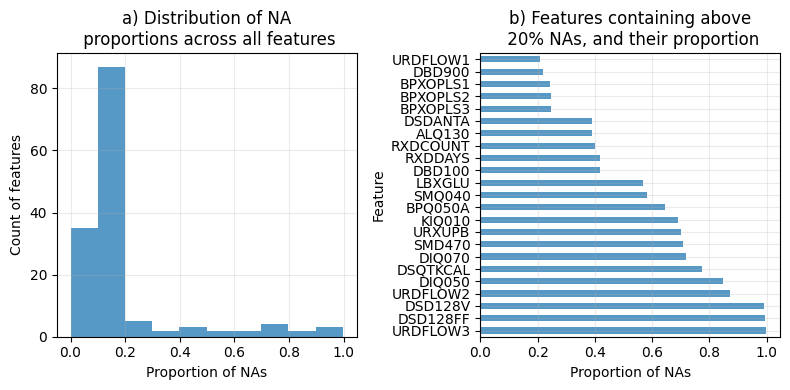

In [11]:
has_na = na_df[na_df["Proportion"] > 0.2].sort_values(by = "Proportion", ascending = False)

fig, ax = plt.subplots(1, 2, figsize = (8, 4), layout = "tight")

ax[0].hist(na_df["Proportion"], bins = 10, alpha = 0.75)
ax[0].set_title("a) Distribution of NA\n proportions across all features")
ax[0].set_xlabel("Proportion of NAs")
ax[0].set_ylabel("Count of features")
ax[0].grid(alpha = 0.25)

has_na.plot.barh(ax = ax[1], legend = False, alpha = 0.75)
ax[1].set_title("b) Features containing above\n 20% NAs, and their proportion")
ax[1].set_yticks(range(len(has_na)), has_na["Feature"])
ax[1].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[1].set_xlabel("Proportion of NAs")
ax[1].set_ylabel("Feature")
ax[1].grid(alpha = 0.25)

#plt.savefig("../results/figures/na_prop.png")
plt.show()

In [12]:
# Assuming df is already defined and loaded with data
df['has_kidney_stones'] = (df['KIQ026'] == 1).astype(int)

dietary_cols = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR',
       'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2',
       'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE',
       'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK',
       'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC',
       'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF',
       'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060',
       'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160',
       'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TM221',
       'DR1TP182', 'DR1TP183', 'DR1TP184', 'DR1TP204', 'DR1TP205',
       'DR1TP225', 'DR1TP226', 'DR1_320Z', 'DR1_330Z', 'DR1BWATZ']

var_labels = {
    'DR1TKCAL': 'Total Energy (kcal)', 'DR1TPROT': 'Protein (gm)', 'DR1TCARB': 'Carbohydrate (gm)',
    'DR1TSUGR': 'Total sugars (gm)', 'DR1TFIBE': 'Dietary fiber (gm)', 'DR1TTFAT': 'Total fat (gm)',
    'DR1TSFAT': 'Total saturated fatty acids (gm)', 'DR1TMFAT': 'Total monounsaturated fatty acids (gm)',
    'DR1TPFAT': 'Total polyunsaturated fatty acids (gm)', 'DR1TCHOL': 'Cholesterol (mg)',
    'DR1TATOC': 'Vitamin E as alpha-tocopherol (mg)', 'DR1TATOA': 'Added alpha-tocopherol (Vitamin E) (mg)',
    'DR1TRET': 'Retinol (mcg)', 'DR1TVARA': 'Vitamin A, RAE (mcg)', 'DR1TACAR': 'Alpha-carotene (mcg)',
    'DR1TBCAR': 'Beta-carotene (mcg)', 'DR1TCRYP': 'Beta-cryptoxanthin (mcg)', 'DR1TLYCO': 'Lycopene (mcg)',
    'DR1TLZ': 'Lutein + zeaxanthin (mcg)', 'DR1TVB1': 'Thiamin (Vitamin B1) (mg)',
    'DR1TVB2': 'Riboflavin (Vitamin B2) (mg)', 'DR1TNIAC': 'Niacin (mg)', 'DR1TVB6': 'Vitamin B6 (mg)',
    'DR1TFOLA': 'Total folate (mcg)', 'DR1TFA': 'Folic acid (mcg)', 'DR1TFF': 'Food folate (mcg)',
    'DR1TFDFE': 'Folate, DFE (mcg)', 'DR1TCHL': 'Total choline (mg)', 'DR1TVB12': 'Vitamin B12 (mcg)',
    'DR1TB12A': 'Added vitamin B12 (mcg)', 'DR1TVC': 'Vitamin C (mg)', 'DR1TVD': 'Vitamin D (D2 + D3) (mcg)',
    'DR1TVK': 'Vitamin K (mcg)', 'DR1TCALC': 'Calcium (mg)', 'DR1TPHOS': 'Phosphorus (mg)',
    'DR1TMAGN': 'Magnesium (mg)', 'DR1TIRON': 'Iron (mg)', 'DR1TZINC': 'Zinc (mg)',
    'DR1TCOPP': 'Copper (mg)', 'DR1TSODI': 'Sodium (mg)', 'DR1TPOTA': 'Potassium (mg)',
    'DR1TSELE': 'Selenium (mcg)', 'DR1TCAFF': 'Caffeine (mg)', 'DR1TTHEO': 'Theobromine (mg)',
    'DR1TALCO': 'Alcohol (gm)', 'DR1TMOIS': 'Moisture (gm)',
    'DR1TS040': 'SFA 4:0 (Butanoic) (gm)', 'DR1TS060': 'SFA 6:0 (Hexanoic) (gm)',
    'DR1TS080': 'SFA 8:0 (Octanoic) (gm)', 'DR1TS100': 'SFA 10:0 (Decanoic) (gm)',
    'DR1TS120': 'SFA 12:0 (Dodecanoic) (gm)', 'DR1TS140': 'SFA 14:0 (Tetradecanoic) (gm)',
    'DR1TS160': 'SFA 16:0 (Hexadecanoic) (gm)', 'DR1TS180': 'SFA 18:0 (Octadecanoic) (gm)',
    'DR1TM161': 'MFA 16:1 (Hexadecenoic) (gm)', 'DR1TM181': 'MFA 18:1 (Octadecenoic) (gm)',
    'DR1TM201': 'MFA 20:1 (Eicosenoic) (gm)', 'DR1TM221': 'MFA 22:1 (Docosenoic) (gm)',
    'DR1TP182': 'PFA 18:2 (Octadecadienoic) (gm)', 'DR1TP183': 'PFA 18:3 (Octadecatrienoic) (gm)',
    'DR1TP184': 'PFA 18:4 (Octadecatetraenoic) (gm)', 'DR1TP204': 'PFA 20:4 (Eicosatetraenoic) (gm)',
    'DR1TP205': 'PFA 20:5 (Eicosapentaenoic) (gm)', 'DR1TP225': 'PFA 22:5 (Docosapentaenoic) (gm)',
    'DR1TP226': 'PFA 22:6 (Docosahexaenoic) (gm)', 'DR1_320Z': 'Total plain water (gm)',
    'DR1_330Z': 'Total tap water (gm)', 'DR1BWATZ': 'Total bottled water (gm)',
    'has_kidney_stones': 'Has Kidney Stones'
}

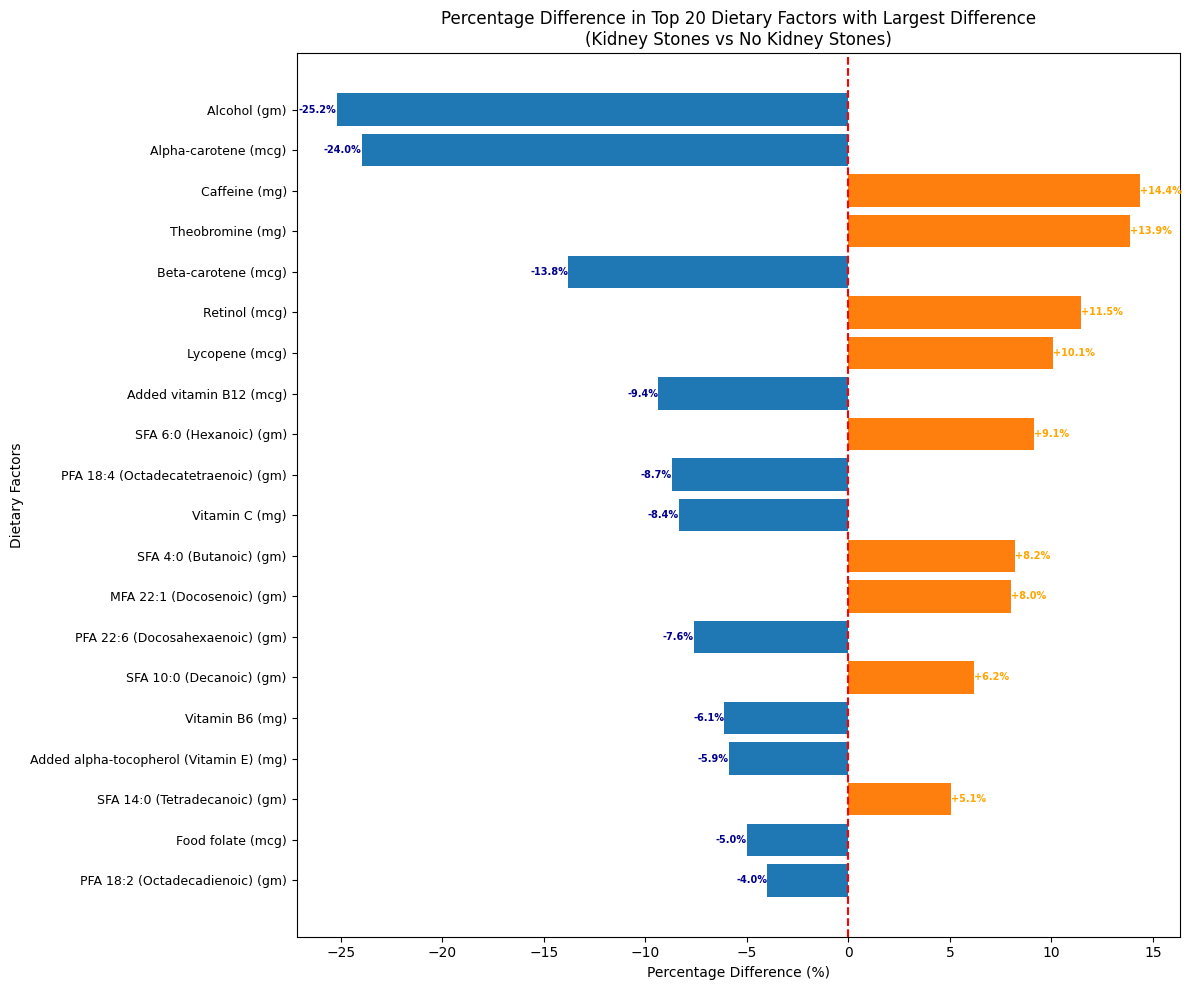

In [13]:
# Function to calculate percentage difference
def percent_diff(a, b):
    return ((a - b) / b) * 100 if b != 0 else 0

# Calculate means and percentage differences for all dietary features
results = []
for var in dietary_cols:
    mean_with_stones = df[df['has_kidney_stones'] == 1][var].mean()
    mean_without_stones = df[df['has_kidney_stones'] == 0][var].mean()
    pct_diff = percent_diff(mean_with_stones, mean_without_stones)
    results.append({
        'Variable': var_labels.get(var, var),  # Use var if label not found
        'Original Variable': var,
        'Mean (With Stones)': mean_with_stones,
        'Mean (Without Stones)': mean_without_stones,
        'Percentage Difference': pct_diff
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort by absolute percentage difference and get top 20
results_df_sorted = results_df.sort_values('Percentage Difference', key=abs, ascending=False).head(20)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 10))

# Use default Matplotlib colors for blue and orange
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
default_orange = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]

# Define colors for the bars
bar_colors = [default_orange if pct > 0 else default_blue for pct in results_df_sorted['Percentage Difference']]

# Plot percentage difference with custom colors
bars = ax.barh(results_df_sorted['Variable'], results_df_sorted['Percentage Difference'], color=bar_colors)

ax.set_title('Percentage Difference in Top 20 Dietary Factors with Largest Difference\n(Kidney Stones vs No Kidney Stones)')
ax.set_xlabel('Percentage Difference (%)')
ax.set_ylabel('Dietary Factors')
ax.axvline(x=0, color='r', linestyle='--')
ax.tick_params(axis='y', labelsize=9)

# Reverse y-axis for bar plot
ax.invert_yaxis()

# Add percentage values to the end of each bar with smaller font size
for i, bar in enumerate(bars):
    width = bar.get_width()
    if width >= 0:
        ax.text(width, bar.get_y() + bar.get_height()/2, f'+{width:.1f}%', 
                ha='left', va='center', fontweight='bold', color='orange', fontsize=7)  # Reduced fontsize
    else:
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                ha='right', va='center', fontweight='bold', color='darkblue', fontsize=7)  # Reduced fontsize

# Add a legend

plt.tight_layout()
#plt.savefig("../results/figures/dietary_difference.png", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
demo_df = df[["KIQ026", "RIAGENDR", "RIDAGEYR", "RIDRETH3", "DMDEDUC2", "DMDMARTZ", "INDFMPIR"]]
demo_map = {
    "KIQ026": {1: "Yes", 2: "No"},
    "RIAGENDR": {1: "Male", 2: "Female"},
    "RIDRETH3": {6: "Asian", 4: "Black", 1: "Mexican\nAmerican", 2: "Other\nHispanic", 7: "Other/Multi", 3: "White"},
    "DMDEDUC2": {1: "< 9th\ngrade", 2: "9-11th\ngrade", 3: "High school\ngrad/GED", 
                 4: "College/\nAA degree", 5: "> College\ngrad", 7: "Refused", 9: "Don't know"},
    "DMDMARTZ": {1: "Married/Living\nwith Partner", 2: "Widowed/Divor-\nced/Separated", 3: "Never married", 77: "Refused", 99: "Don't know"}
}

demo_df = demo_df.apply(lambda x: x.map(demo_map.get(x.name, {})) if x.name in demo_map.keys() else x)
demo_df = demo_df.apply(
    lambda x: pd.Categorical(x, categories = demo_map[x.name].values(), ordered = True) if x.name in demo_map.keys() else x
)

demo_df.rename(columns = {
    "KIQ026": "Kidney stones", 
    "RIAGENDR": "Gender", 
    "RIDAGEYR": "Age", 
    "RIDRETH3": "Race", 
    "DMDEDUC2": "Education level", 
    "DMDMARTZ": "Marital status", 
    "INDFMPIR": "Income ratio"
}, inplace = True)

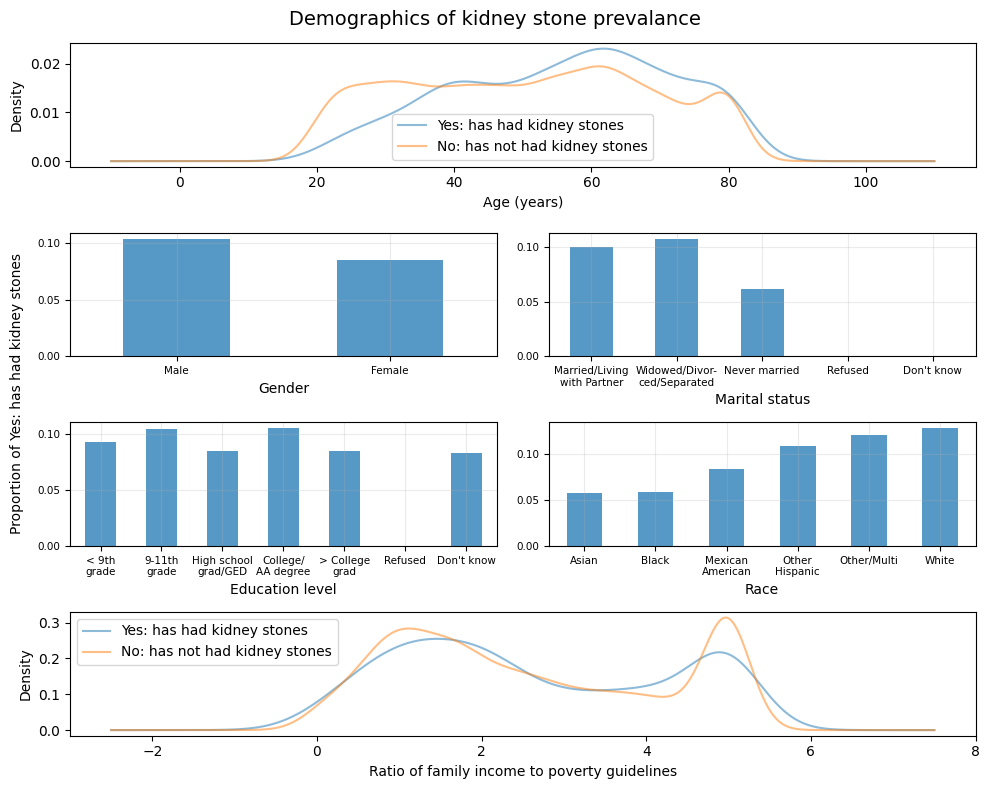

In [15]:
fig = plt.figure(figsize = (10, 8))

ax = [
    plt.subplot(4, 2, (1, 2)),
    plt.subplot(4, 2, 3),
    plt.subplot(4, 2, 4),
    plt.subplot(4, 2, 5),
    plt.subplot(4, 2, 6),
    plt.subplot(4, 2, (7, 8))
]

for i, col in enumerate(demo_df[["Gender", "Marital status", "Education level", "Race"]], 1):
    pd.crosstab(demo_df[col], demo_df["Kidney stones"], normalize = "index")["Yes"].plot(
        kind = "bar", ax = ax[i], rot = 0, stacked = True, legend = False, fontsize = 7.5, alpha = 0.75,
    )
    ax[i].grid(alpha = 0.25)

## boxplots for age and income ratio
#for i, col in zip([0, 5], demo_df[["Age", "Income ratio"]]):
#    col_groupby = demo_df[col].groupby(demo_df["Kidney stones"], observed = False).apply(lambda x: x.dropna().tolist())
#    ax[i].boxplot(col_groupby, vert = False)
#    ax[i].set_yticks([1,2], col_groupby.index)
#    ax[i].grid(alpha = 0.25)
#    ax[i].set_ylabel("Had kidney stones?")

## kde for age and income ratio - looks better
for i, col in zip([0, 5], ["Age", "Income ratio"]):
    demo_df.loc[demo_df["Kidney stones"] == "Yes", col].plot.kde(ax = ax[i], alpha = 0.5, label = "Yes: has had kidney stones")
    demo_df.loc[demo_df["Kidney stones"] == "No", col].plot.kde(ax = ax[i], alpha = 0.5, label = "No: has not had kidney stones")
    ax[i].legend()

ax[0].set_xlabel("Age (years)")
ax[5].set_xlabel("Ratio of family income to poverty guidelines")

plt.suptitle("Demographics of kidney stone prevalance", fontsize = 14)
fig.text(0.015, 0.5, "Proportion of Yes: has had kidney stones", fontsize = 10, va = "center", rotation = 90)
fig.tight_layout()

#plt.savefig("../results/figures/demo_ks_prev.png")
plt.show()

In [16]:
cond_cols = ["BPQ020", "BPQ080", "DIQ010", "DIQ160", "KIQ022", "MCQ080", "MCQ160M", "MCQ550", "MCQ160L"]
cond_df = pd.DataFrame({col: pd.crosstab(df["KIQ026"], df[col], normalize = "columns")[1] for col in cond_cols})
cond_df.rename(columns = {
    "BPQ020": "High blood pressure",
    "BPQ080": "High cholesterol",
    "DIQ010": "Diabetes",
    "DIQ160": "Prediabetes",
    "KIQ022": "Weak/failing kidneys",
    "MCQ080": "Overweight",
    "MCQ160M": "Thyroid problem",
    "MCQ550": "Gallstones",
    "MCQ160L": "Liver condition"
}, inplace = True)
cond_df = cond_df.T

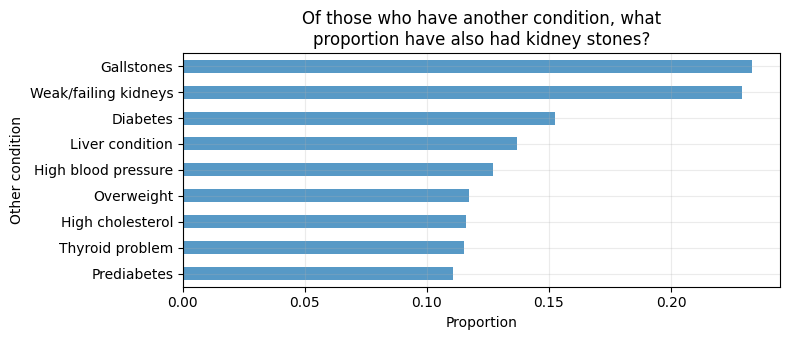

In [17]:
fig, ax = plt.subplots(figsize = (8,3.5))

cond_df[1].sort_values().plot.barh(ax = ax, alpha = 0.75)
ax.set_title("Of those who have another condition, what\nproportion have also had kidney stones?")
ax.grid(alpha = 0.25)
ax.set_xlabel("Proportion")
ax.set_ylabel("Other condition")

plt.tight_layout()
#plt.savefig("../results/figures/cond_ks_prop.png")
plt.show()

In [18]:
lab_cols = ["LBXSBU", "LBXSCA", "LBXSUA", "URDACT", "LBXGLU", "URXUPB"]
lab_names = [
    "Fasting glucose (mg/dL)",
    "Blood urea nitrogen (mg/dL)",
    "Total calcium (mg/dL)",
    "Uric acid (mg/dL)",
    "Albumin creatinine ratio (mg/g)",
    "Lead, urine (ug/L)"
]

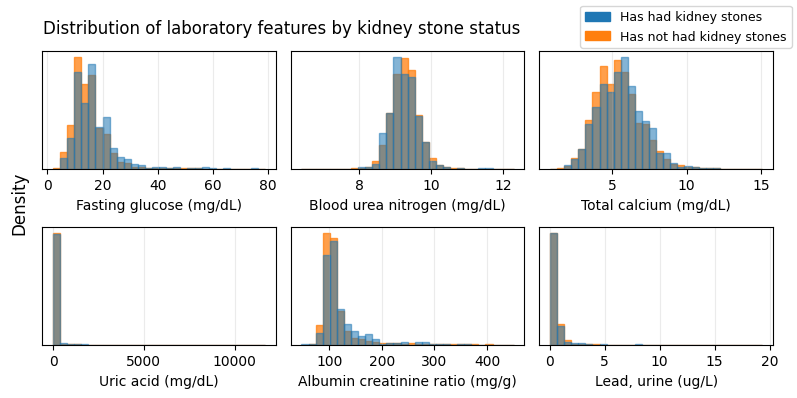

In [19]:
fig, ax = plt.subplots(2, 3, figsize = (8,4))
axr = ax.ravel()

for i, col in enumerate(lab_cols):
    bin_width = np.linspace(df[col].min(), df[col].max(), 31)
    axr[i].hist(df.loc[df["KIQ026"] == 2, col], bins = bin_width, alpha = 0.75, facecolor = "tab:orange", edgecolor = "tab:orange", density = True)
    axr[i].hist(df.loc[df["KIQ026"] == 1, col], bins = bin_width, alpha = 0.55, color = "tab:blue", edgecolor = "tab:blue", density = True)
    axr[i].yaxis.set_visible(False)
    axr[i].set_ylabel(None)
    axr[i].set_xlabel(lab_names[i])
    axr[i].grid(alpha = 0.25)

fig.legend(handles = [
    mpatches.Patch(color = "tab:blue", label = "Has had kidney stones"),
    mpatches.Patch(color = "tab:orange", label = "Has not had kidney stones")
], loc = "upper right", fontsize = 9)
fig.suptitle("Distribution of laboratory features by kidney stone status", x = 0.36, y = 0.96)
fig.supylabel("Density")
plt.tight_layout()

#plt.savefig("../results/figures/lab_dist.png")
plt.show()

C:\Users\educational\AppData\Local\Temp\ipykernel_19496\217090790.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_with_stones, label='Kidney Stones', shade=True)
C:\Users\educational\AppData\Local\Temp\ipykernel_19496\217090790.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_without_stones, label='No Kidney Stones', shade=True)


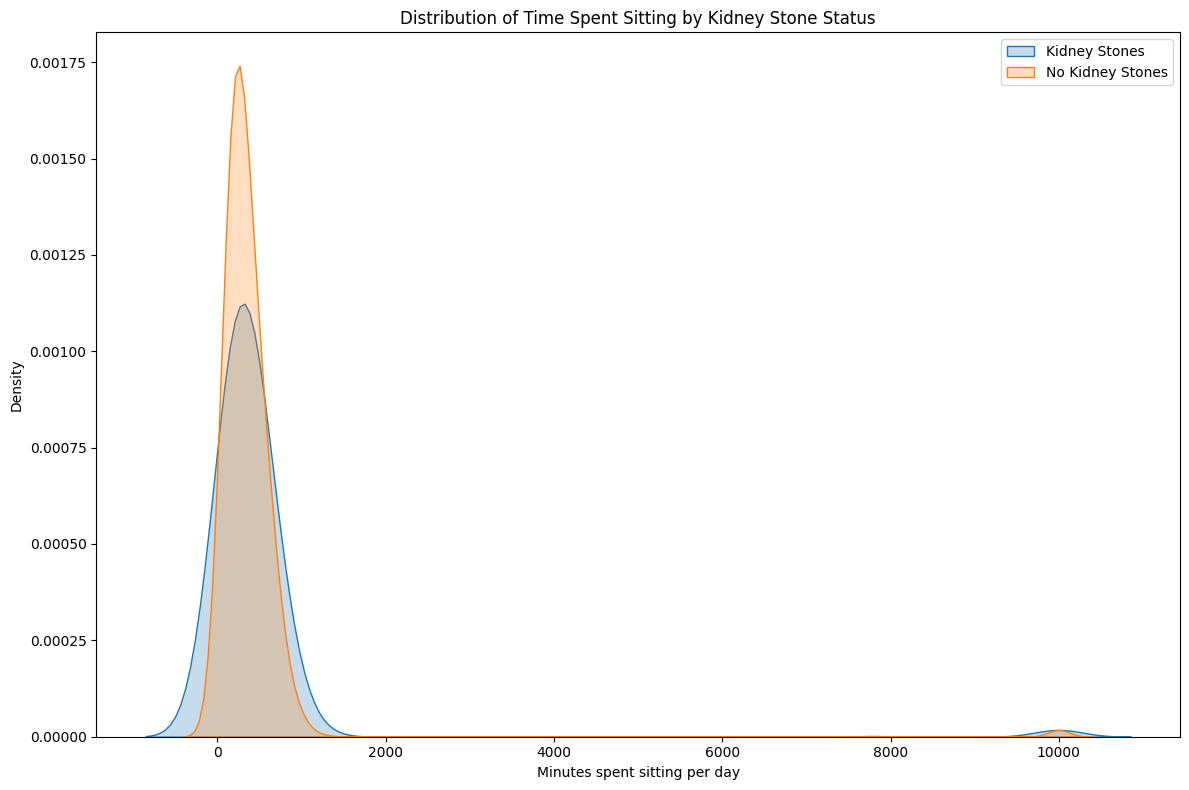

In [20]:

# Assuming df is your dataframe
time_spent = 'PAD680'  # Time spent sitting

df_filtered = df

# Replace 1 and 2 with "Yes" and "No" for kidney stones
df_filtered['KIQ026'] = df_filtered['KIQ026'].astype(str).map({'1': 'Yes', '2': 'No'})

# Create the plot
plt.figure(figsize=(12, 8))

# Separate data for those with and without kidney stones
data_with_stones = df_filtered[df_filtered['KIQ026'] == 'Yes'][time_spent].dropna()
data_without_stones = df_filtered[df_filtered['KIQ026'] == 'No'][time_spent].dropna()

# Plot distributions
sns.kdeplot(data_with_stones, label='Kidney Stones', shade=True)
sns.kdeplot(data_without_stones, label='No Kidney Stones', shade=True)

plt.xlabel('Minutes spent sitting per day')
plt.ylabel('Density')
plt.title('Distribution of Time Spent Sitting by Kidney Stone Status')
plt.legend()

plt.tight_layout()
#plt.savefig("../results/figures/time_spent_sitting_kidney_stones.png", dpi=300, bbox_inches='tight')
plt.show()

Number of people with kidney stones: 866
Number of people without kidney stones: 8342


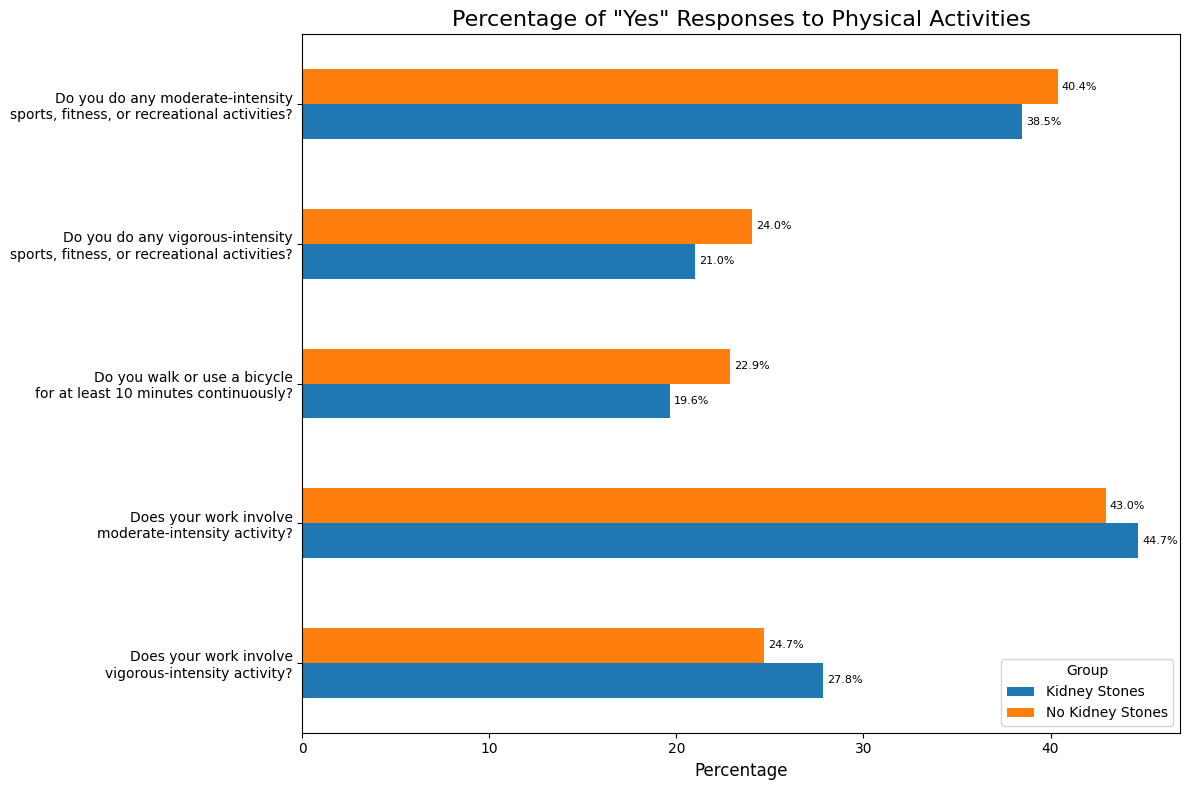

In [21]:

df_analysis = df.copy()

# Map 'Yes' to 1 and 'No' to 2
df_analysis['KIQ026'] = df_analysis['KIQ026'].map({'Yes': 1, 'No': 2})

def percent_yes(series):
    return (series == 1).mean() * 100

# Separating the data into two groups
kidney_stones = df_analysis[df_analysis['KIQ026'] == 1]
no_kidney_stones = df_analysis[df_analysis['KIQ026'] == 2]

# Print the sizes of the groups
print("Number of people with kidney stones:", len(kidney_stones))
print("Number of people without kidney stones:", len(no_kidney_stones))

# List of physical activity variables with their full questions
activity_vars = {
    'PAQ605': 'Does your work involve\nvigorous-intensity activity?',
    'PAQ620': 'Does your work involve\nmoderate-intensity activity?',
    'PAQ635': 'Do you walk or use a bicycle\nfor at least 10 minutes continuously?',
    'PAQ650': 'Do you do any vigorous-intensity\nsports, fitness, or recreational activities?',
    'PAQ665': 'Do you do any moderate-intensity\nsports, fitness, or recreational activities?'
}

# Calculate percentage of 'Yes' responses for each activity
activity_percentages = pd.DataFrame({
    'Kidney Stones': kidney_stones[activity_vars.keys()].apply(percent_yes),
    'No Kidney Stones': no_kidney_stones[activity_vars.keys()].apply(percent_yes)
})

# Rename the index with full questions
activity_percentages.index = activity_vars.values()

# Plotting the percentages
fig, ax = plt.subplots(figsize=(12, 8))
activity_percentages.plot(kind='barh', ax=ax)
plt.title('Percentage of "Yes" Responses to Physical Activities', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.legend(title='Group', fontsize=10, loc='lower right')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Add value labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontsize=8)

plt.tight_layout()
#plt.savefig("../results/figures/physical_activities.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
plt.close("all")